Caret is the Sklearn equivalent for R it's a great R package which provides general interface to more than 150 ML algorithms. It also provides great functions to sample the data (for training and testing), preprocessing, evaluating the model etc.,

For more info on Caret goto:
https://www.youtube.com/watch?v=7Jbb2ItbTC4 


In [1]:
library(caret)

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [2]:
library(e1071)#support package to caret

# 0. Load data

In [3]:
# library(ISLR) #using smarket: Daily percentage returns for the S&P 500 stock index between 2001 and 2005

In [19]:
#import and read data
df <- read.csv("Offlinedf.csv", header = TRUE)

# 1. Data description

In [20]:
head(df)

X,posX,posY,angle,X00.14.bf.b1.97.8a,X00.14.bf.b1.97.90,X00.0f.a3.39.e1.c0,X00.14.bf.b1.97.8d,X00.14.bf.b1.97.81,X00.14.bf.3b.c7.c6,X00.0f.a3.39.dd.cd
1,0,0,0,-41.98489,-57.20774,-51.15455,-64.55649,-62.84349,-65.38813,-68.13182
2,0,1,0,-44.97125,-58.22891,-50.57273,-61.07673,-67.18656,-65.19788,-70.33636
3,0,2,0,-47.72008,-58.70679,-59.95455,-61.81601,-61.18764,-61.26058,-68.49831
4,0,3,0,-51.10097,-56.79017,-55.53636,-58.28706,-56.71622,-62.36238,-69.08939
5,0,4,0,-49.08489,-53.58976,-48.09091,-63.42386,-57.11135,-64.77592,-68.96818
6,0,7,0,-46.97932,-62.51826,-57.30000,-55.15113,-64.02953,-64.57951,-71.43636




Description:




# 2. DATA EXPLORATION

In [26]:
str(df)

'data.frame':	166 obs. of  11 variables:
 $ X                 : int  1 2 3 4 5 6 7 8 9 10 ...
 $ posX              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ posY              : int  0 1 2 3 4 7 8 9 10 11 ...
 $ angle             : int  0 0 0 0 0 0 0 0 0 0 ...
 $ X00.14.bf.b1.97.8a: num  -42 -45 -47.7 -51.1 -49.1 ...
 $ X00.14.bf.b1.97.90: num  -57.2 -58.2 -58.7 -56.8 -53.6 ...
 $ X00.0f.a3.39.e1.c0: num  -51.2 -50.6 -60 -55.5 -48.1 ...
 $ X00.14.bf.b1.97.8d: num  -64.6 -61.1 -61.8 -58.3 -63.4 ...
 $ X00.14.bf.b1.97.81: num  -62.8 -67.2 -61.2 -56.7 -57.1 ...
 $ X00.14.bf.3b.c7.c6: num  -65.4 -65.2 -61.3 -62.4 -64.8 ...
 $ X00.0f.a3.39.dd.cd: num  -68.1 -70.3 -68.5 -69.1 -69 ...


In [27]:
summary(df)

       X               posX            posY            angle  
 Min.   :  1.00   Min.   : 0.00   Min.   : 0.000   Min.   :0  
 1st Qu.: 42.25   1st Qu.: 3.00   1st Qu.: 3.000   1st Qu.:0  
 Median : 83.50   Median :13.00   Median : 6.500   Median :0  
 Mean   : 83.50   Mean   :14.25   Mean   : 5.916   Mean   :0  
 3rd Qu.:124.75   3rd Qu.:23.00   3rd Qu.: 8.000   3rd Qu.:0  
 Max.   :166.00   Max.   :33.00   Max.   :13.000   Max.   :0  
 X00.14.bf.b1.97.8a X00.14.bf.b1.97.90 X00.0f.a3.39.e1.c0 X00.14.bf.b1.97.8d
 Min.   :-70.02     Min.   :-79.51     Min.   :-64.21     Min.   :-67.31    
 1st Qu.:-61.70     1st Qu.:-73.68     1st Qu.:-57.06     1st Qu.:-58.93    
 Median :-57.49     Median :-68.75     Median :-53.50     Median :-55.16    
 Mean   :-56.44     Mean   :-66.26     Mean   :-53.38     Mean   :-54.86    
 3rd Qu.:-51.13     3rd Qu.:-59.09     3rd Qu.:-49.87     3rd Qu.:-51.36    
 Max.   :-40.37     Max.   :-40.23     Max.   :-42.79     Max.   :-39.76    
 X00.14.bf.b1.97.81 

In [25]:
colnames(df, do.NULL = TRUE, prefix = "col")

[1] "X"                  "posX"               "posY"              
 [4] "angle"              "X00.14.bf.b1.97.8a" "X00.14.bf.b1.97.90"
 [7] "X00.0f.a3.39.e1.c0" "X00.14.bf.b1.97.8d" "X00.14.bf.b1.97.81"
[10] "X00.14.bf.3b.c7.c6" "X00.0f.a3.39.dd.cd"

# 3. PREPROCESSING
(clean up the data to get it ready to pass it in the machine)

In [45]:
# check for na and impute or remove na 
is.na(df)

 logi [1:166, 1:11] FALSE FALSE FALSE FALSE FALSE FALSE ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:11] "X" "posX" "posY" "angle" ...


In [50]:
#2. TODO: variable imputation check and replace missing value using knn
#remove na quick fix
df2 <- na.omit(df) 

In [51]:
str(df2) ### no value remove

'data.frame':	166 obs. of  11 variables:
 $ X                 : int  1 2 3 4 5 6 7 8 9 10 ...
 $ posX              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ posY              : int  0 1 2 3 4 7 8 9 10 11 ...
 $ angle             : int  0 0 0 0 0 0 0 0 0 0 ...
 $ X00.14.bf.b1.97.8a: num  -42 -45 -47.7 -51.1 -49.1 ...
 $ X00.14.bf.b1.97.90: num  -57.2 -58.2 -58.7 -56.8 -53.6 ...
 $ X00.0f.a3.39.e1.c0: num  -51.2 -50.6 -60 -55.5 -48.1 ...
 $ X00.14.bf.b1.97.8d: num  -64.6 -61.1 -61.8 -58.3 -63.4 ...
 $ X00.14.bf.b1.97.81: num  -62.8 -67.2 -61.2 -56.7 -57.1 ...
 $ X00.14.bf.3b.c7.c6: num  -65.4 -65.2 -61.3 -62.4 -64.8 ...
 $ X00.0f.a3.39.dd.cd: num  -68.1 -70.3 -68.5 -69.1 -69 ...


In [6]:
# 1. Split train and test set

In [57]:
set.seed(300) 
#Spliting data as training and test set. Using createDataPartition() function from caret
indxTrain <- createDataPartition(y = df$posY,p = 0.75,list = FALSE)
training <- df[indxTrain,]
testing <- df[-indxTrain,]

In [60]:
str(training)

'data.frame':	126 obs. of  11 variables:
 $ X                 : int  1 2 3 5 6 9 10 11 12 13 ...
 $ posX              : int  0 0 0 0 0 0 0 0 0 1 ...
 $ posY              : int  0 1 2 4 7 10 11 12 13 0 ...
 $ angle             : int  0 0 0 0 0 0 0 0 0 0 ...
 $ X00.14.bf.b1.97.8a: num  -42 -45 -47.7 -49.1 -47 ...
 $ X00.14.bf.b1.97.90: num  -57.2 -58.2 -58.7 -53.6 -62.5 ...
 $ X00.0f.a3.39.e1.c0: num  -51.2 -50.6 -60 -48.1 -57.3 ...
 $ X00.14.bf.b1.97.8d: num  -64.6 -61.1 -61.8 -63.4 -55.2 ...
 $ X00.14.bf.b1.97.81: num  -62.8 -67.2 -61.2 -57.1 -64 ...
 $ X00.14.bf.3b.c7.c6: num  -65.4 -65.2 -61.3 -64.8 -64.6 ...
 $ X00.0f.a3.39.dd.cd: num  -68.1 -70.3 -68.5 -69 -71.4 ...


In [66]:
# variabe standardization or normalized or (centered and scaled). using the caret pre-process  object
trainX <- training[,names(training)!= "angle"] ## remove not numerical column
preProcObj <- preProcess(x = trainX,method = c("center", "scale"))
preProcObj

Created from 126 samples and 10 variables

Pre-processing:
  - centered (10)
  - ignored (0)
  - scaled (10)


In [67]:
preProc_trainX <- predict(preProcObj, trainX)

In [68]:
head(preProc_trainX)

,X,posX,posY,X00.14.bf.b1.97.8a,X00.14.bf.b1.97.90,X00.0f.a3.39.e1.c0,X00.14.bf.b1.97.8d,X00.14.bf.b1.97.81,X00.14.bf.3b.c7.c6,X00.0f.a3.39.dd.cd
1,-1.659021,-1.289539,-2.1100743,1.9044714,0.8973503,0.4484205,-1.696633826,-1.04925819,-1.0151552,0.27643033
2,-1.638267,-1.289539,-1.7527230,1.4999809,0.7905687,0.5755244,-1.071775361,-1.81037445,-0.9794307,-0.04431562
3,-1.617512,-1.289539,-1.3953717,1.1276640,0.7405972,-1.4740264,-1.204528599,-0.75907261,-0.2401244,0.22310905
5,-1.576004,-1.289539,-0.6806691,0.9428061,1.2756749,1.1177021,-1.493248391,-0.04470837,-0.9001997,0.15474527
6,-1.555250,-1.289539,0.3913847,1.2279965,0.3420400,-0.8941147,-0.007720591,-1.25710941,-0.8633196,-0.20435793
9,-1.492987,-1.289539,1.4634386,1.2972688,1.6833057,-0.6538089,-1.923320589,-0.99859798,-0.7975301,0.12101735


In [69]:
summary(preProc_trainX)

       X                  posX              posY         X00.14.bf.b1.97.8a
 Min.   :-1.659021   Min.   :-1.2895   Min.   :-2.1101   Min.   :-1.8933   
 1st Qu.:-0.885926   1st Qu.:-1.1012   1st Qu.:-1.0380   1st Qu.:-0.7026   
 Median :-0.009059   Median :-0.1121   Median : 0.2127   Median :-0.1469   
 Mean   : 0.000000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000   
 3rd Qu.: 0.826299   3rd Qu.: 0.8769   3rd Qu.: 0.7487   3rd Qu.: 0.8738   
 Max.   : 1.765427   Max.   : 1.8188   Max.   : 2.5355   Max.   : 2.1226   
 X00.14.bf.b1.97.90 X00.0f.a3.39.e1.c0 X00.14.bf.b1.97.8d X00.14.bf.b1.97.81
 Min.   :-1.4344    Min.   :-2.40347   Min.   :-2.19186   Min.   :-2.2712   
 1st Qu.:-0.8881    1st Qu.:-0.77992   1st Qu.:-0.66842   1st Qu.:-0.6611   
 Median :-0.2820    Median : 0.01608   Median :-0.07329   Median :-0.0161   
 Mean   : 0.0000    Mean   : 0.00000   Mean   : 0.00000   Mean   : 0.0000   
 3rd Qu.: 0.7383    3rd Qu.: 0.72150   3rd Qu.: 0.57374   3rd Qu.: 0.5794   
 Max. 

# 4. FIT MODEL & PREDICT

In [33]:
# multi-variate knn-reg
#predictor (dependent variable ): tem <-  
#knn.reg(train, test = NULL, y, k = 3, algorithm=c("kd_tree", 
#         "cover_tree", "brute"))

In [199]:
########### TRAINING THE X COORDINATE  MODEL#######################

In [187]:
head(trainX[,names(trainX)!= "posY"])

,X,posX,X00.14.bf.b1.97.8a,X00.14.bf.b1.97.90,X00.0f.a3.39.e1.c0,X00.14.bf.b1.97.8d,X00.14.bf.b1.97.81,X00.14.bf.3b.c7.c6,X00.0f.a3.39.dd.cd
1,1,0,-41.98489,-57.20774,-51.15455,-64.55649,-62.84349,-65.38813,-68.13182
2,2,0,-44.97125,-58.22891,-50.57273,-61.07673,-67.18656,-65.19788,-70.33636
3,3,0,-47.72008,-58.70679,-59.95455,-61.81601,-61.18764,-61.26058,-68.49831
5,5,0,-49.08489,-53.58976,-48.09091,-63.42386,-57.11135,-64.77592,-68.96818
6,6,0,-46.97932,-62.51826,-57.30000,-55.15113,-64.02953,-64.57951,-71.43636
9,9,0,-46.46788,-49.69152,-56.20000,-65.81888,-62.55442,-64.22914,-69.20000


In [188]:
set.seed(400)
ctrl <- trainControl(method="repeatedcv",repeats = 3) # default 10 fold cross validation during training and do 3 time the 10 fold CV
knnFit <- train(posX ~ ., data = trainX[,names(trainX)!= "posY"], method = "knn", trControl = ctrl, preProcess = c("center","scale"), tuneLength = 20)##tuneLengh to atomatically try 20  k value

#Output of kNN fit
knnFit

k-Nearest Neighbors 

126 samples
  8 predictor

Pre-processing: centered (8), scaled (8) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 113, 114, 113, 113, 114, 113, ... 
Resampling results across tuning parameters:

  k   RMSE      Rsquared   MAE     
   5  1.458111  0.9831867  1.134091
   7  1.434107  0.9835386  1.138430
   9  1.452408  0.9833936  1.170191
  11  1.477086  0.9826846  1.180692
  13  1.535457  0.9813458  1.195356
  15  1.575241  0.9803827  1.225940
  17  1.641528  0.9792952  1.281758
  19  1.691846  0.9781380  1.335156
  21  1.787938  0.9757827  1.405696
  23  1.866837  0.9740946  1.474120
  25  1.962969  0.9715104  1.531092
  27  2.023986  0.9701785  1.572005
  29  2.076814  0.9685969  1.616285
  31  2.132714  0.9670360  1.655601
  33  2.202719  0.9655744  1.700097
  35  2.261849  0.9643655  1.740460
  37  2.338323  0.9635663  1.793600
  39  2.461883  0.9614797  1.903918
  41  2.593051  0.9609293  2.027813
  43  2.728492  0.9606980 

### The best k is the one that minimize the prediction error RMSE (root mean squared error).

### The RMSE corresponds to the square root of the average difference between the observed known outcome values and the predicted values, RMSE = mean((observeds - predicteds)^2) %>% sqrt(). The lower the RMSE, the better the model.

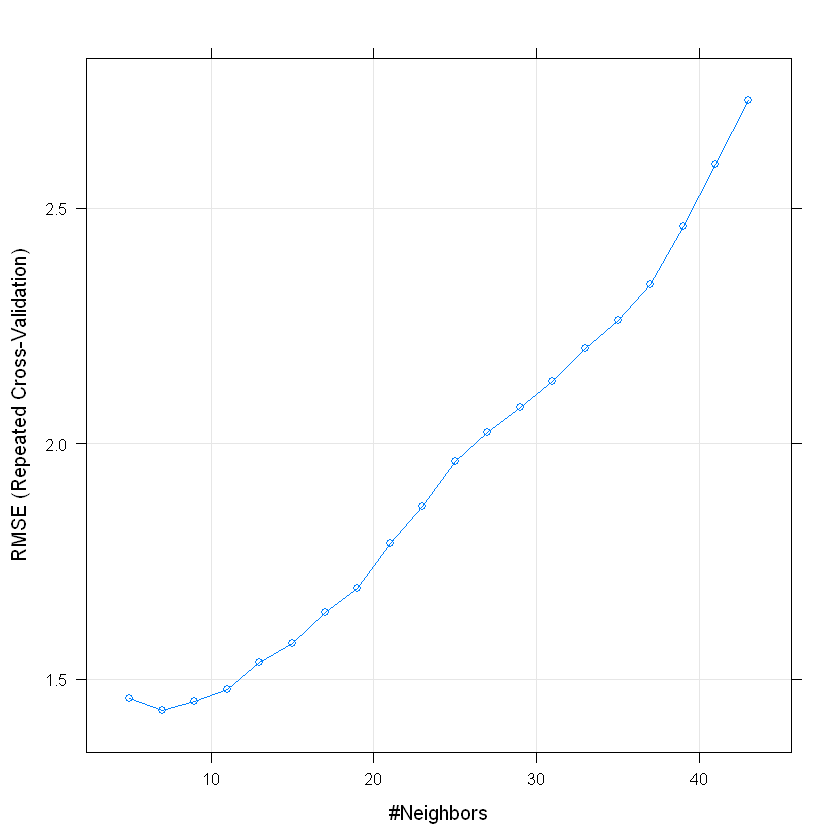

In [189]:
#Plotting yields Number of Neighbours Vs accuracy (based on repeated cross validation)
plot(knnFit)

In [168]:
# Print the best tuning parameter k that
# maximizes model accuracy
knnFit$bestTune

,k
2,7


In [179]:
head(testing[,names(testing)!= "angle"])

,X,posX,posY,X00.14.bf.b1.97.8a,X00.14.bf.b1.97.90,X00.0f.a3.39.e1.c0,X00.14.bf.b1.97.8d,X00.14.bf.b1.97.81,X00.14.bf.3b.c7.c6,X00.0f.a3.39.dd.cd
4,4,0,3,-51.10097,-56.79017,-55.53636,-58.28706,-56.71622,-62.36238,-69.08939
7,7,0,8,-48.42360,-53.54905,-49.77273,-59.83663,-61.93624,-66.05527,-68.10909
8,8,0,9,-53.45483,-56.47158,-50.99091,-62.92592,-64.46243,-66.68757,-67.06364
18,18,1,5,-47.02975,-58.54078,-52.40909,-59.93825,-62.29847,-68.01485,-66.86364
23,23,1,10,-49.51729,-56.57829,-59.46713,-60.94734,-66.25756,-64.50706,-74.08182
25,25,1,12,-44.57301,-48.40184,-55.25455,-61.44989,-68.84003,-66.32090,-71.74376


In [198]:
testing_X = testing[,(names(testing)!= "angle" & names(testing)!= "posY")]
head(testing_X)

,X,posX,X00.14.bf.b1.97.8a,X00.14.bf.b1.97.90,X00.0f.a3.39.e1.c0,X00.14.bf.b1.97.8d,X00.14.bf.b1.97.81,X00.14.bf.3b.c7.c6,X00.0f.a3.39.dd.cd
4,4,0,-51.10097,-56.79017,-55.53636,-58.28706,-56.71622,-62.36238,-69.08939
7,7,0,-48.42360,-53.54905,-49.77273,-59.83663,-61.93624,-66.05527,-68.10909
8,8,0,-53.45483,-56.47158,-50.99091,-62.92592,-64.46243,-66.68757,-67.06364
18,18,1,-47.02975,-58.54078,-52.40909,-59.93825,-62.29847,-68.01485,-66.86364
23,23,1,-49.51729,-56.57829,-59.46713,-60.94734,-66.25756,-64.50706,-74.08182
25,25,1,-44.57301,-48.40184,-55.25455,-61.44989,-68.84003,-66.32090,-71.74376


In [194]:
knnPredict_X <- predict(knnFit,newdata = testing_X)
#Get the confusion matrix to see accuracy value and other parameter values
# confusionMatrix(pred_knn, test_w_a$posX) ### df[c("posX","posY")]

In [196]:
# can't compute confusion matrix for non factor prediction
# we Compute the prediction error RMSE
RMSE(knnPredict_X, testing$posX)

[1] 1.996298

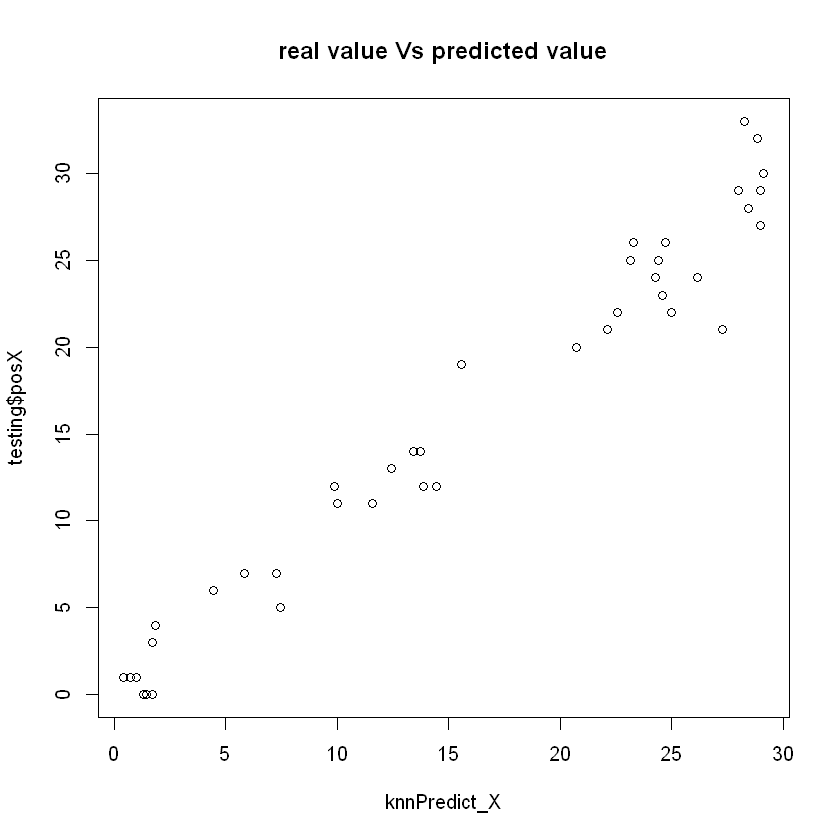

In [197]:
## show how error graoh real value Vs predicted value
plot(knnPredict_X, testing$posX,main = "real value Vs predicted value")


### based on the single value postX prediction, we can clearly see that real value is a function of the predicted value, so real value = predictedValue + error or =  a*predictedValue + b
### we can optimize our model by defining and b  or by fitting a linear model between knn and testvalue. 

In [201]:
########### TRAINING THE Y COORDINATE  MODEL#######################
set.seed(400)
ctrl <- trainControl(method="repeatedcv",repeats = 3) # default 10 fold cross validation during training and do 3 time the 10 fold CV
knnFit <- train(posY~ ., data = trainX[,names(trainX)!= "posX"], method = "knn", trControl = ctrl, preProcess = c("center","scale"), tuneLength = 20)##tuneLengh to atomatically try 20  k value

#Output of kNN fit
knnFit

k-Nearest Neighbors 

126 samples
  8 predictor

Pre-processing: centered (8), scaled (8) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 114, 113, 114, 114, 114, 114, ... 
Resampling results across tuning parameters:

  k   RMSE      Rsquared   MAE     
   5  2.114653  0.4737216  1.623718
   7  2.107516  0.4802199  1.645984
   9  2.142750  0.4680264  1.696418
  11  2.185584  0.4933365  1.770055
  13  2.214418  0.4930095  1.822652
  15  2.289468  0.4649194  1.882723
  17  2.365225  0.4275169  1.964297
  19  2.409751  0.4194097  2.005485
  21  2.435773  0.4278903  2.040978
  23  2.481607  0.3869383  2.078842
  25  2.530248  0.3314200  2.118878
  27  2.560470  0.3080387  2.145807
  29  2.610774  0.2477056  2.190970
  31  2.654652  0.1989037  2.226536
  33  2.668583  0.1852471  2.245270
  35  2.693143  0.1511227  2.267407
  37  2.690761  0.1627480  2.266458
  39  2.704362  0.1467938  2.283629
  41  2.716822  0.1378280  2.294261
  43  2.727847  0.1207694 

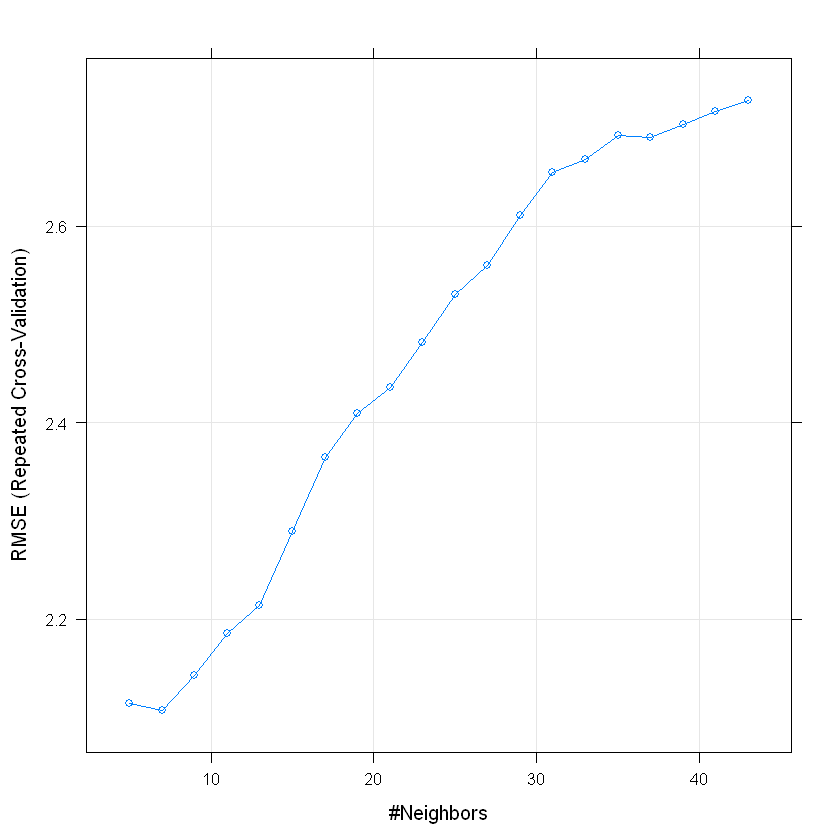

In [202]:
#Plotting yields Number of Neighbours Vs accuracy (based on repeated cross validation)
plot(knnFit)

In [204]:
testing_Y = testing[,(names(testing)!= "angle" & names(testing)!= "posX")]

In [205]:
knnPredict_Y <- predict(knnFit,newdata = testing_Y)

In [206]:
# can't compute confusion matrix for non factor prediction
# we Compute the prediction error RMSE
RMSE(knnPredict_Y, testing$posY)

[1] 1.537292

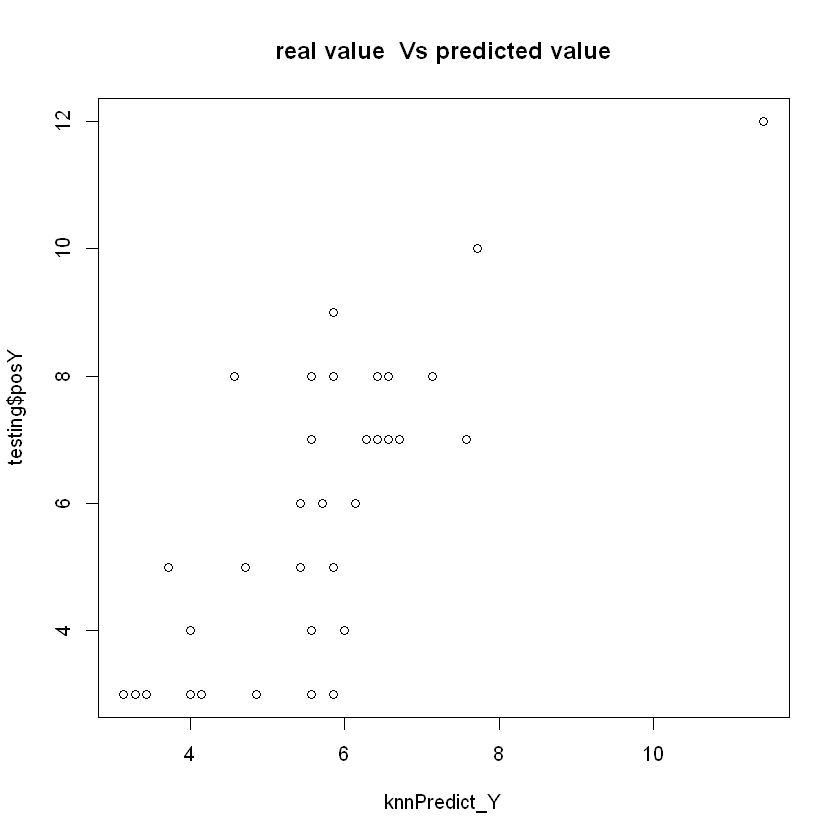

In [208]:
## show how error graoh real value Vs predicted value
plot(knnPredict_Y, testing$posY,main = "real value  Vs predicted value")

In [141]:
# manually compute accuracy
# Compute model accuracy rate
# mean(predicted.classes == test.data$diabetes)

In [ ]:
### convert the angle the  to continue value and use the angle as continue value

#### run the model removing one at the time 
00:0f:a3:39:dd:cd

00:0f:a3:39:e1:c0
